In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train = pd.read_csv("titanic_train.csv")
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

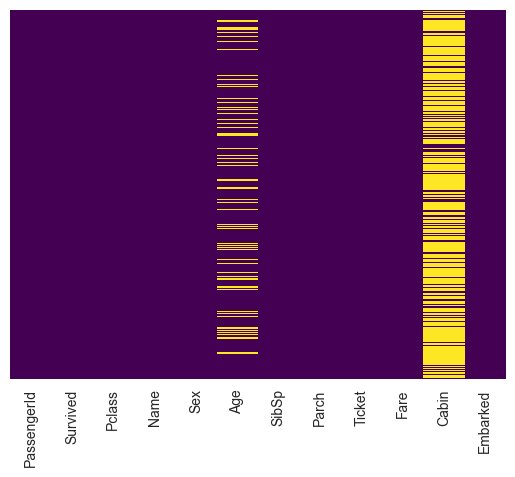

In [17]:
#now we need to make a heatmap with isnull to do explotary data to see where is our data missing
sns.heatmap(train.isnull(),yticklabels = False,cbar =False, cmap = 'viridis')


In [18]:
#from this I know that we are missing some age info and cabin info. like how we can use POWERBI to 
#analyse better


In [19]:
sns.set_style('whitegrid')


<AxesSubplot:xlabel='Survived', ylabel='count'>

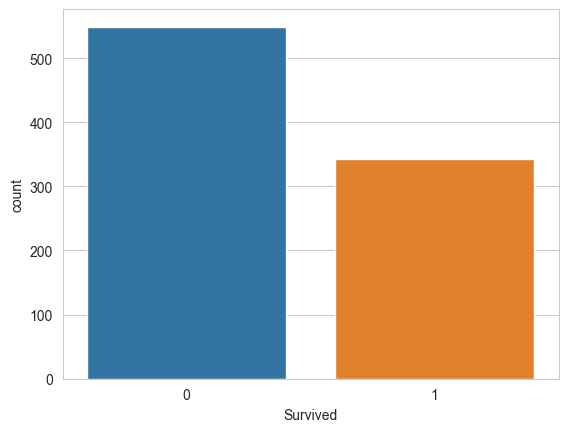

In [20]:
#compared to linear regression for distribution and correlation of main features and overall feature 
#for logistic regression, we would want to see the ratio of just the main feature of labels 1,0
sns.countplot(x = 'Survived',data = train)

In [21]:
#from the graph we can see that there is quite alot of people that did not survived compared to the ones that survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

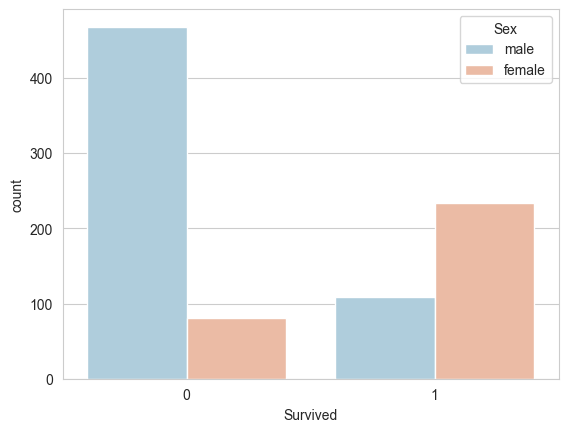

In [22]:
#after that we compare our main label y with other features to see how they correlation 
#with countplot 
sns.countplot(x = 'Survived', data = train, hue = 'Sex',palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

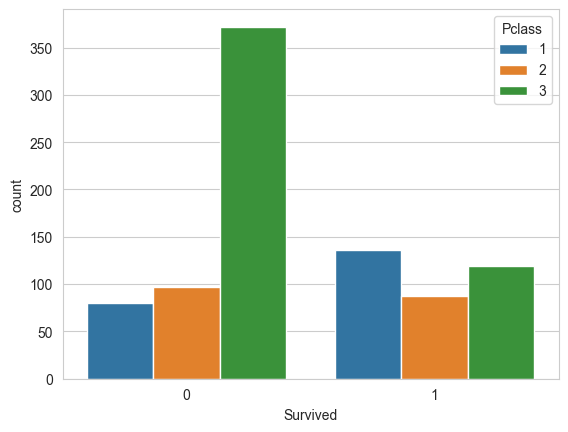

In [23]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

In [24]:
#based on the graph those that did survive tend to be from those from class 1,2
#STUDY ON THE DISTRUBTIONS OF different features 

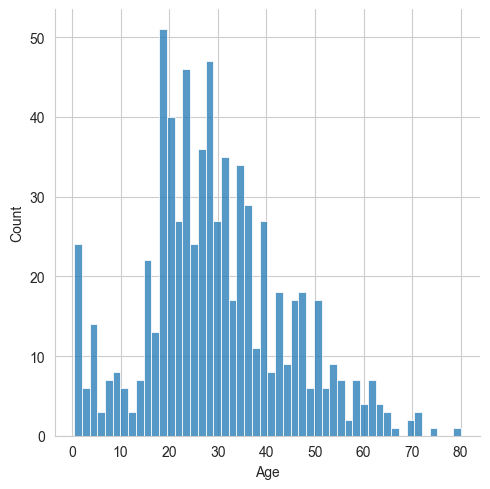

In [25]:
#so right now we also want to see the distribution of the ages with our null values not inside 

sns.displot(train['Age'].dropna(),bins = 50)

In [26]:
#we have a bimodal distribution with two peaks,whereby we have quite alot of passengers
#below 8-10 and as we go forward, we have quite an average age of 20 to 30. 
#the older the lesser distribution

<AxesSubplot:xlabel='SibSp', ylabel='count'>

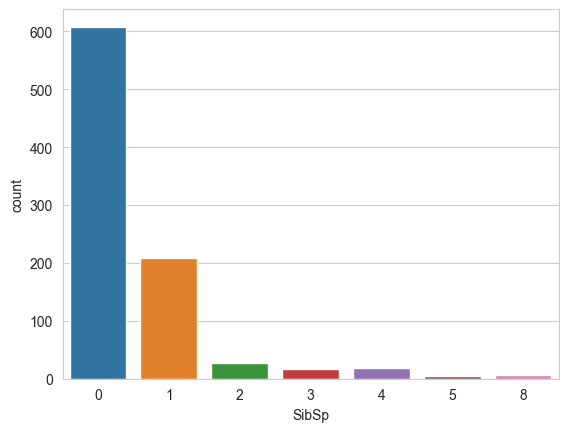

In [27]:
#wanted to search up distribution of SibSp
sns.countplot(x = 'SibSp', data = train)

In [ ]:
#based on that interesting that people do not have a sibling or children on board 
#probably its the men or ladies in 3rd class

In [36]:
import cufflinks as cf

In [37]:
cf.go_offline()

In [38]:
train['Fare'].iplot(kind = 'hist', bins = 30)
#these make sense because there is alot of people who bought 3rd class